# Major Symptoms Of Heart Attack.
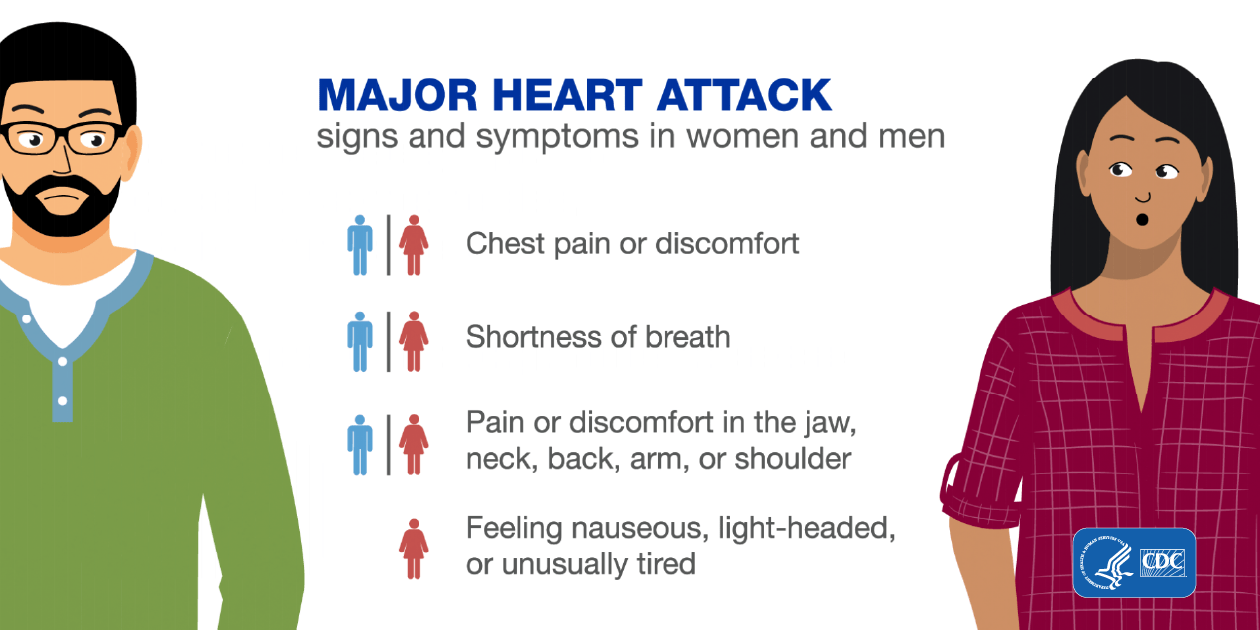

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
# load the dataset
dataset = pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")

In [ ]:
# see first 5 rows
dataset.head()

In [ ]:
# dataset shape
dataset.shape

In [ ]:
# check the null values
dataset.isna().any()
# So, their is no null value

In [ ]:
# information about dataset
dataset.info()

In [ ]:
# Check the unique value
dataset.target.unique()

In [ ]:
# import some visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# visualize total count of sex
sns.countplot(x=dataset["sex"], data=dataset)

In [ ]:
# But Its a ques that sex column contains two value, 0, 1
# Which one is male and which one is female?
# Men have a greater risk of heart attack than women do, and men have attacks earlier in life. Even after women reach the age of menopause, when women's death rate from heart disease increases, women's risk for heart attack is less than that for men.
# google.com # heart.org

In [ ]:
sns.barplot(x=dataset["sex"], y=dataset["target"], data=dataset)

In [ ]:
# According to google i think 0 is male and 1 is female

In [ ]:
sns.set_style('whitegrid')
g = sns.FacetGrid(dataset, hue="target", palette="coolwarm", size=6, aspect=2)
g.map(plt.hist, 'age', bins=20, alpha=0.7)
plt.legend()

In [ ]:
# lmplot
sns.set_style('whitegrid')
sns.lmplot('target', 'age', data=dataset, hue='sex', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [ ]:
# visualize the correation

plt.figure(figsize=(12, 6))
g = dataset.corr()
data = g.index
sns.heatmap(dataset[data].corr(), annot=True)

In [ ]:
# we see that cp(chest pain) is highly positive correlation with target
# thalach(maximum heart rate achieved) is also correlated with target
# exang(exercise induced angina) is highly negative correalted

In [ ]:
corr_mat = dataset.corr()

In [ ]:
corr_mat["target"].sort_values(ascending=False)

In [ ]:
# lets split the dataset
X = dataset.drop("target", axis=1)
y = dataset["target"]
seed = 42
size = 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=size)

In [ ]:
# length of train and test
print(len(X_train))
print(len(X_test))

In [ ]:
# import necessary packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

def accuracy_summary(algo_name, pipeline, X_train, y_train, X_test, y_test):
    classifier_fit = pipeline.fit(X_train, y_train)
    y_pred = classifier_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    table = tabulate({
        "Model Name": [algo_name],
        "Accuracy": [accuracy],
    }, headers="keys", tablefmt="github")
    print(table)
    print("\n")
    print(f"Confusion Matrix For {algo_name}:")
    print(confusion)
    print("\n")
    return accuracy

names = [
    'Logistic Regression',
    'SVC',
    "K Nearest Neighbour",
    "Random Forest",
    'GaussianNB',
]
classifiers = LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB() 
zipped_classifier = zip(names, classifiers)

def classifier_compare(X_train, y_train, X_test, y_test, classifier=zipped_classifier):
    for n, c in classifier:
        if n == "Random Forest": # Scaling not affect in Tree Based Model
            checker_pipeline = Pipeline([
                ('classifier', c), 
            ])
        else:
            checker_pipeline = Pipeline([
                ('scaler', StandardScaler()), 
                ('classifier', c),
            ])
        clf_accuracy = accuracy_summary(n, checker_pipeline, X_train, y_train, X_test, y_test)
        # save model using joblib
        dump(c, f"{n}_model.joblib")
        print("\n")
        print(f">>Model Saved")
        print("\n")

In [ ]:
comp_val = classifier_compare(X_train, y_train, X_test, y_test, classifier=zipped_classifier)
comp_val

In [ ]:
from joblib import load, dump

In [ ]:
from joblib import dump, load
c = load('./K Nearest Neighbour_model.joblib')
predict = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
pred = c.predict(predict)
if pred == 1:
    print(">> More chance of heart attack")
else:
    print(">> Less chance of heart attack")

# I tried to predict in easy way and want to make it full clear.

# Please upvote me, It will encourage me more